<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/Sunspot_TFSpec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!unzip '/content/archive_4.zip'

Archive:  /content/archive_4.zip
  inflating: daily-minimum-temperatures-in-me.csv  


In [2]:
import pandas as pd

In [25]:
with open('/content/sunspot.xlsx',encoding='utf-8') as f:
  data=f.readlines()

UnicodeDecodeError: ignored

In [80]:
data=pd.read_csv('/content/daily-minimum-temperatures-in-me (1).csv')

,date,tempa
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [81]:
data['tempa']=pd.to_numeric(data['tempa'])

In [82]:
x=data.iloc[:,[1]].values

In [83]:
x

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [84]:
import numpy as np 
import tensorflow as tf
import keras


In [86]:
x_train=[]
y_train=[]
for i in range(30,3622):
  x_train.append(x[i-30:i])
  y_train.append(x[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)


In [87]:
x_train.shape



(3592, 30, 1)

In [52]:
#adding extra dimensions
#x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [88]:
x_train.shape

(3592, 30, 1)

In [114]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv1D(10,2,strides=1,input_shape=(x_train.shape[1],1)),
    tf.keras.layers.LSTM(200,activation='tanh',return_sequences=True),
    tf.keras.layers.LSTM(120,activation='tanh',return_sequences=False),
    tf.keras.layers.Dense(1)
]

)

In [115]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.Huber())

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 10)            30        
_________________________________________________________________
lstm_10 (LSTM)               (None, 29, 200)           168800    
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)               154080    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 121       
Total params: 323,031
Trainable params: 323,031
Non-trainable params: 0
_________________________________________________________________


In [109]:
patience = 1
stop_patience = 3
factor = 0.5

callbacks = [
    #tf.keras.callbacks.ModelCheckpoint("classify_model.h5", save_best_only=True, verbose = 0),
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='train_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='train_loss', factor=factor, patience=patience, verbose=1)
]

In [117]:
history=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
113/113 [==============================] - 15s 109ms/step - loss: 4.7218
Epoch 2/100
113/113 [==============================] - 12s 109ms/step - loss: 2.0069
Epoch 3/100
113/113 [==============================] - 12s 109ms/step - loss: 1.7752
Epoch 4/100
113/113 [==============================] - 12s 109ms/step - loss: 1.7254
Epoch 5/100
113/113 [==============================] - 13s 111ms/step - loss: 1.6833
Epoch 6/100
113/113 [==============================] - 13s 112ms/step - loss: 1.6308
Epoch 7/100
113/113 [==============================] - 13s 113ms/step - loss: 1.5842
Epoch 8/100
113/113 [==============================] - 12s 109ms/step - loss: 1.5376
Epoch 9/100
113/113 [==============================] - 12s 109ms/step - loss: 1.5137
Epoch 10/100
113/113 [==============================] - 12s 109ms/step - loss: 1.5030
Epoch 11/100
113/113 [==============================] - 13s 111ms/step - loss: 1.4865
Epoch 12/100
113/113 [==============================] - 13s 112

In [111]:
x_test=[]
y_test=[]
for i in range(3592,3622):
  x_test.append(x[i-3592:i])
  y_test.append(x[i,0])
x_test=np.array(x_test)
y_test=np.array(y_test)


In [112]:
preds=model.predict(x_test)

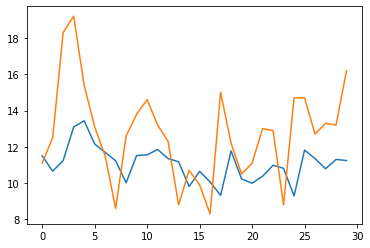

In [113]:
import matplotlib.pyplot as plt

plt.plot(preds)
plt.plot(y_test)